# Deming Regression
-------------------------------

This function shows how to use TensorFlow to solve linear Deming regression.

$y = Ax + b$

We will use the iris data, specifically:

y = Sepal Length and x = Petal Width.

Deming regression is also called total least squares, in which we minimize the shortest distance from the predicted line and the actual (x,y) points.

If least squares linear regression minimizes the vertical distance to the line, Deming regression minimizes the total distance to the line.  This type of regression minimizes the error in the y values and the x values.  See the below figure for a comparison.

<img src="../images/05_demming_vs_linear_reg.png" width="512">

To implement this in TensorFlow, we start by loading the necessary libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

Start a computational graph session:

In [2]:
sess = tf.Session()

# Set a random seed
tf.set_random_seed(42)
np.random.seed(42)

We load the iris data.

In [3]:
# Load the data
# iris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data]) # Petal Width
y_vals = np.array([y[0] for y in iris.data]) # Sepal Length

Next we declare the batch size, model placeholders, model variables, and model operations.

In [4]:
# Declare batch size
batch_size = 125

# Initialize placeholders
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Create variables for linear regression
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# Declare model operations
model_output = tf.add(tf.matmul(x_data, A), b)

For the demming loss, we want to compute:

$$ \frac{\left| A \cdot x + b - y \right|}{\sqrt{A^{2} + 1}} $$

Which will give us the shortest distance between a point (x,y) and the predicted line, $A \cdot x + b$.

In [5]:
# Declare Deming loss function
deming_numerator = tf.abs(tf.subtract(tf.add(tf.matmul(x_data, A), b), y_target))
deming_denominator = tf.sqrt(tf.add(tf.square(A),1))
loss = tf.reduce_mean(tf.truediv(deming_numerator, deming_denominator))

Next we declare the optimization function and initialize all model variables.

In [6]:
# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.25)
train_step = my_opt.minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

Now we train our Deming regression for 250 iterations.

In [7]:
# Training loop
loss_vec = []
for i in range(1500):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    if (i+1)%100==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

Step #100 A = [[3.0726142]] b = [[1.7809945]]
Loss = 0.47351116
Step #200 A = [[2.4791956]] b = [[2.522906]]
Loss = 0.4120035
Step #300 A = [[1.7441005]] b = [[3.6184309]]
Loss = 0.37118915
Step #400 A = [[1.0046556]] b = [[4.5442853]]
Loss = 0.26205948
Step #500 A = [[0.9638405]] b = [[4.605]]
Loss = 0.24394163
Step #600 A = [[0.96017563]] b = [[4.6268764]]
Loss = 0.26399365
Step #700 A = [[1.0218917]] b = [[4.6011143]]
Loss = 0.28519714
Step #800 A = [[1.0040245]] b = [[4.5968676]]
Loss = 0.27684262
Step #900 A = [[1.043581]] b = [[4.606966]]
Loss = 0.29077518
Step #1000 A = [[1.0042043]] b = [[4.6473894]]
Loss = 0.25255314
Step #1100 A = [[1.0124936]] b = [[4.635666]]
Loss = 0.27939135
Step #1200 A = [[0.97916406]] b = [[4.575562]]
Loss = 0.25290507
Step #1300 A = [[1.0078632]] b = [[4.581728]]
Loss = 0.2552546
Step #1400 A = [[1.0334944]] b = [[4.626392]]
Loss = 0.25675926
Step #1500 A = [[0.96745807]] b = [[4.6006155]]
Loss = 0.2478789


Retrieve the optimal coefficients (slope and intercept).

In [8]:
# Get the optimal coefficients
[slope] = sess.run(A)
[y_intercept] = sess.run(b)

# Get best fit line
best_fit = []
for i in x_vals:
  best_fit.append(slope*i+y_intercept)

Here is matplotlib code to plot the best fit Deming regression line and the Demming Loss.

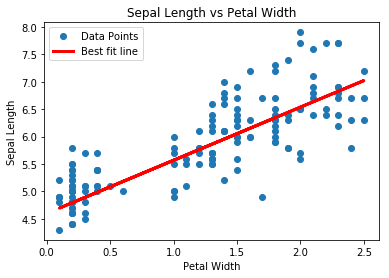

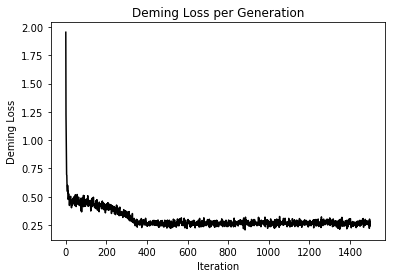

In [9]:
# Plot the result
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.show()

# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('Deming Loss per Generation')
plt.xlabel('Iteration')
plt.ylabel('Deming Loss')
plt.show()